# Figure 1: analysis on PEDs per country

With this jupyter notebook you can generates Figure 1 of:  van der Most et al. Temporally compounding energy droughts in European electricity systems with hydropower

In [12]:
import pandas as pd
import numpy as np
import string
import matplotlib.colors
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

## importing data 

In [6]:
# residual loads during events
folder = 'data_for_images/'
df_seasons = {s:pd.read_csv(folder+f'residual_q0.97_{s}_v4_daygap3.csv', index_col=0) for s in ['winter', 'summer', 'all']}
all_events = df_seasons['all']

# # mean annual residual loads
df_mean_resloads = pd.read_csv(folder + 'mean_residual_load_and_std.csv',  index_col=0)

## Plotting
- distribution of PED events and event length

In [7]:
# figure settings
colors_seasons = {
    'winter':'#0000FF',
    'summer': '#ff9412',
    'all':'#E8246F',
}
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white",colors_seasons['all']])

# Set the font to sans-serif, preferring Helvetica or Arial
mpl.rcParams['font.sans-serif'] = ["Helvetica", "Arial", "sans-serif"]

# Set the default font type to sans-serif
mpl.rcParams['font.family'] = 'sans-serif'

# Set the maximum font size to 7pt
mpl.rcParams['font.size'] = 7
mpl.rcParams['legend.fontsize'] = 7

# Set the minimum font size for smaller text elements, like tick labels
mpl.rcParams['xtick.labelsize'] = 5
mpl.rcParams['ytick.labelsize'] = 5

In [8]:
# countries
countries = ['NOR', 'FRA', 'ESP', 'SWE', 'ITA']

# Data for mappings (mapping between indexes and countries in the data)
data = {
    'index_nr': [30, 15, 13, 35, 20],
    'name': ['Norway', 'France', 'Spain', 'Sweden', 'Italy']
}

# Creating the mapping dataframe
df_countries = pd.DataFrame(data)

# Setting the index to ISO31661A3
df_countries.index = ['NOR', 'FRA', 'ESP', 'SWE', 'ITA']

/usr/people/most/miniconda3/envs/clever/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


120.0


/usr/people/most/miniconda3/envs/clever/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/usr/people/most/miniconda3/envs/clever/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


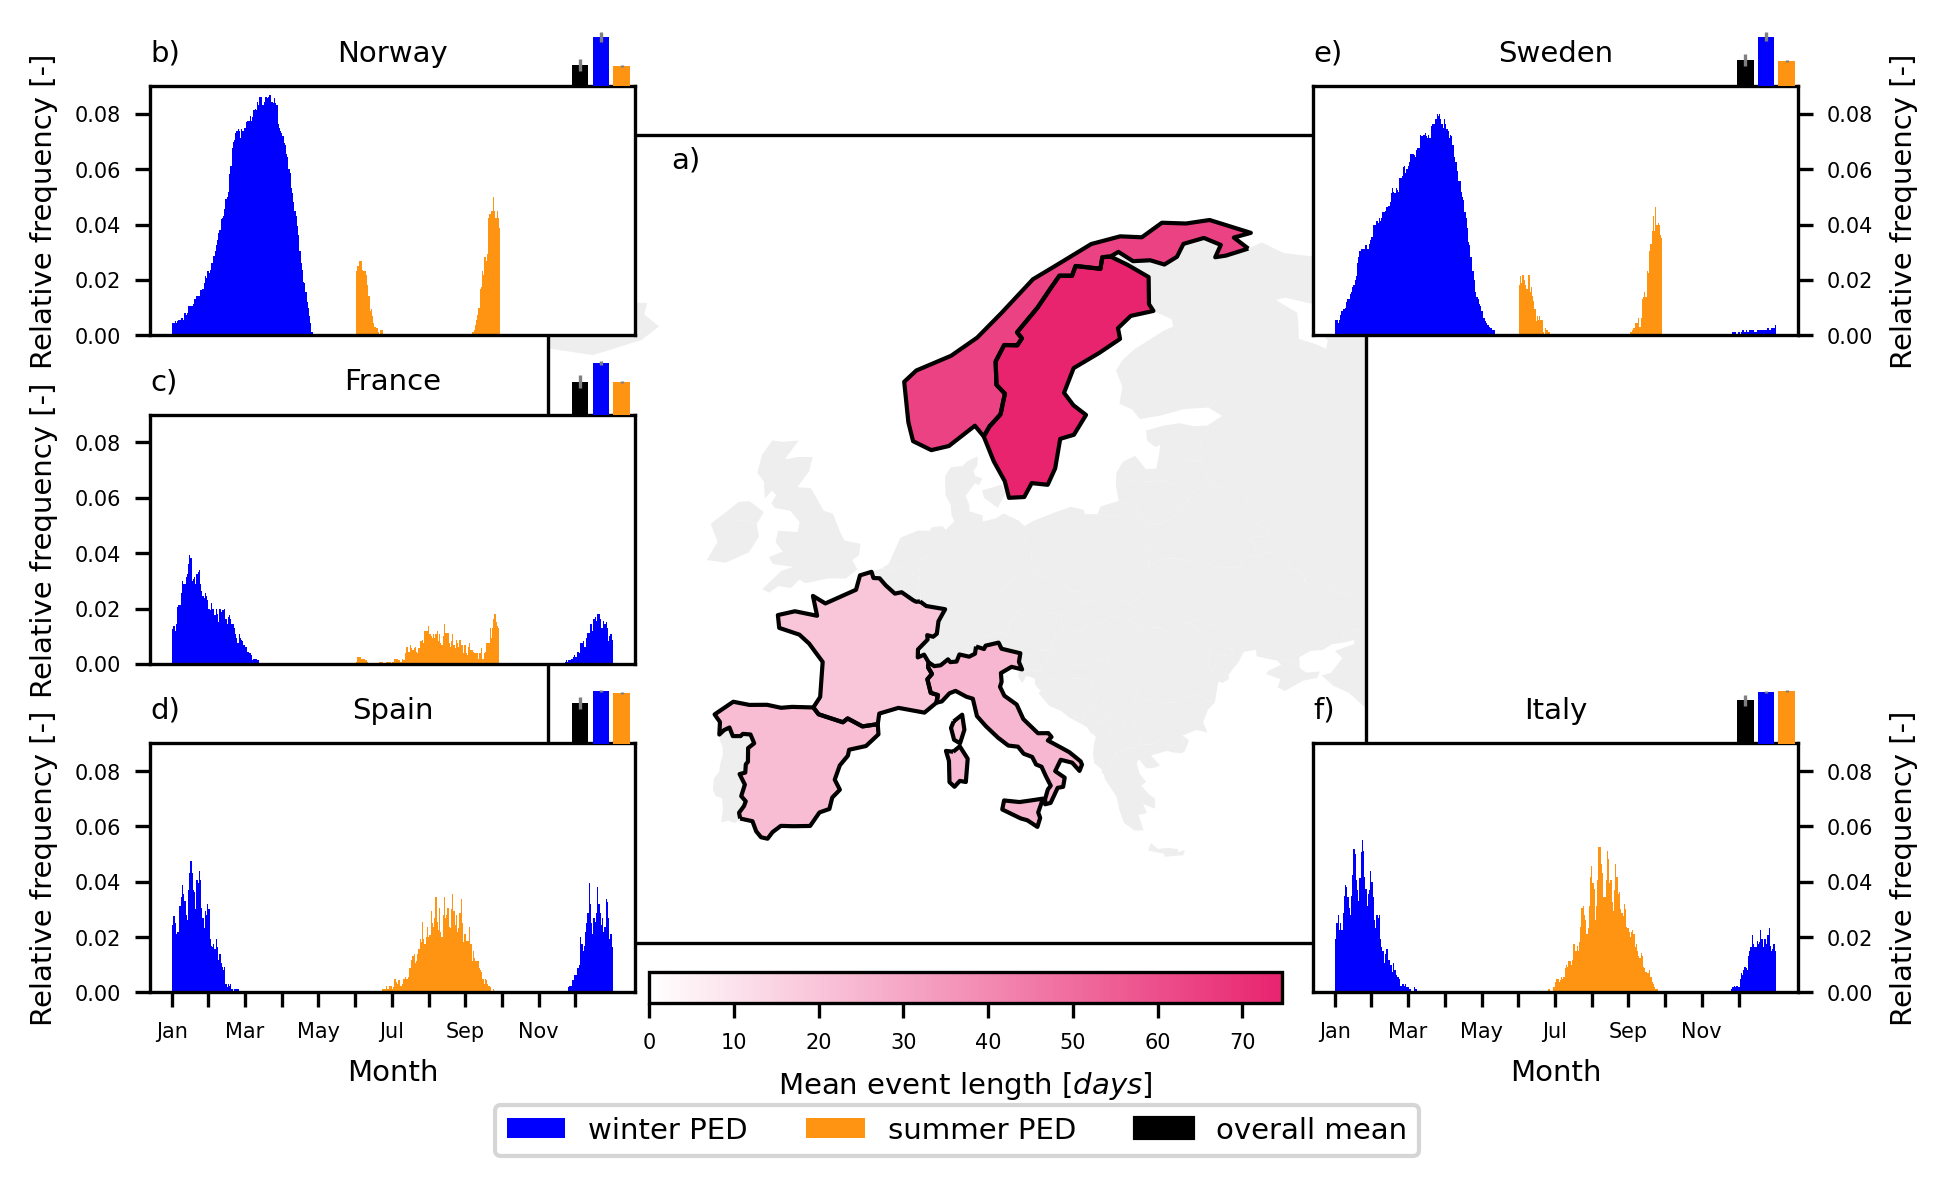

In [11]:
# Load a GeoDataFrame containing European country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']

# rename 
mapping_names = dict(zip(df_countries.name,df_countries.index))
mapping_names_rev = {v:k for k,v in mapping_names.items()}
for n in europe.name:
    if n in mapping_names.keys():
        europe.loc[europe.name==n, 'iso_a3'] = mapping_names[n]

def get_event_day_distrb(df, country):
    dfc = df.loc[df.country==country]
    dfcplot = dfc.groupby('doy').count()['index']
    dfcplot = dfcplot.sort_index()
    return dfcplot.sort_index()
        
# Function to adjust subplot positions
def adjust_subplot_position(ax, x0, x1, y0, y1):
    pos = ax.get_position()
    pos.x0 += x0
    pos.x1 += x1
    pos.y0 += y0
    pos.y1 += y1
    ax.set_position(pos)

# Define the size in millimeters
width_mm = 180
height_mm = (8/12)*180

print(height_mm)

# Convert to inches
width_in = width_mm / 25.4
height_in = height_mm / 25.4

# Create the figure and subplot grid
fig = plt.figure(figsize=(width_in, height_in ),constrained_layout=True, dpi=300)  # Adjust the figure size

# topbottom space
tbs = -0.05
# right left shift
rlf = -0.008
# padding subplots
pds = 0.01

# add europe figure
ax0 = fig.add_subplot(1, 1, 1)  # europe
# make a but higher than the subfigures
adjust_subplot_position(ax0, 0, 0, -tbs, tbs)
# set the axis range per country:
winter_event = {'NOR':[60,105], 
                'FRA':[5,25],
                'ITA':[10,36],
                'SWE':[37,100], 
                'ESP':[8,30]}

## plot distributions
for i,j in enumerate([1,4,7,3,9]):
    ax_sub = fig.add_subplot(3, 3, j)
    ax_sub.set_title(mapping_names_rev[countries[i]], fontsize = 7)
    # Adjust the position to shift to the left
    adjust_subplot_position(ax_sub, -rlf, -rlf, pds, -pds)
    for season in ['winter', 'summer', ]:
        df = df_seasons[season]
        data = get_event_day_distrb(df, countries[i])
        data = data.loc[data.index<366]
        # make it relative frequencies
        data = data / 1600 #data.sum()
        ax_sub.bar(data.index, data.values, color=colors_seasons[season], 
                   alpha= 1 if season in ['winter', 'summer'] else 1 ,
                   width=1.0, label = season)
        ax_sub.set_ylabel('Relative frequency [-]')
        ax_sub.set_ylim([0,0.09])
    
    if j in (3,6,9):
        ax_sub.yaxis.set_label_position("right")
        ax_sub.yaxis.tick_right()
        adjust_subplot_position(ax_sub, 0,0, 0, 0)
    if j ==7:
        h,l = ax_sub.get_legend_handles_labels()
        l = ['winter PED', 'summer PED', 'overall mean']
        black_patch = mpatches.Patch(color='black', label='The black data')
        h.append(black_patch)
        ax0.legend(h, l, bbox_to_anchor=(0.5, -0.2), loc='upper center', borderaxespad=0, ncol =3)
        
    if j in (7,9):
        ax_sub.set_xlabel('Month')
        months =  ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec')
        months =  ('Jan', '', 'Mar', '', 'May', '', 'Jul', '', 'Sep', '', 'Nov', '')
        labels = months #months[::2]
        ax_sub.set_xticks(np.linspace(0,365,13)[:-1])
        ax_sub.set_xticklabels(labels)#, rotation = 45, ha="right")
        
        continue
    else:
        ax_sub.xaxis.set_tick_params(labelbottom=False)
        ax_sub.set_xticks([])
    
# plot the selection
selection = europe.loc[europe.iso_a3.isin(countries)]
mean_event_length = df_seasons['all'].groupby(['country', 'event_nr'])['nr_of_days'].mean().groupby('country').mean()
for c in countries:
    selection.loc[selection.iso_a3 == c, 'event_length'] = mean_event_length[c]

# plot length of events 
pcm = selection.plot(column = 'event_length', ax=ax0, linewidth=1, cmap = cmap, vmin=0, legend=False, zorder=1)

# Plot Europe borders on top on ax0 using GeoPandas
europe.plot(ax=ax0, linewidth=1, color='#EEEEEE', zorder=0)
selection.boundary.plot(ax=ax0, linewidth=1, color='black')

# Optionally, you can set the axis limits for ax0 to focus on Europe
ax0.set_xlim(-22, 40)
ax0.set_ylim(30, 76)
# Hide X and Y axes label marks


ax0.yaxis.set_tick_params(labelleft=False)
ax0.set_yticks([])
ax0.xaxis.set_tick_params(labelbottom=False)
ax0.set_xticks([])

cb = ax0.collections[0]
cbar = plt.colorbar(cb, ax=fig.axes, location='bottom', shrink=0.38, pad=-0.02)
cbar.ax.set_xlabel('Mean event length [$days$]')

# make axis 7 pt
for n, ax in enumerate(fig.axes):
    if ax == ax0:
        ax.text(0.15, 0.96, string.ascii_lowercase[n] + ')', transform=ax.transAxes, 
               size=7)
    elif ax == fig.axes[-1]:
        continue
    else:
        ax.text(-0, 1.1, string.ascii_lowercase[n] + ')', transform=ax.transAxes, 
                size=7)

## add barplots
# get barplot data for mean events
all_days = df_mean_resloads['mean_day']
all_days.name = 'mean day'
yerror = df_mean_resloads['yerror']
yerror.name = 'mean day'

# the mean of all events (winter summer and all days)
events_summer = df_seasons['summer'].groupby('country').residual.mean()
events_summer.name = 'summer events'
events_winter = df_seasons['winter'].groupby('country').residual.mean()
events_winter.name = 'winter events'
df = pd.concat([all_days, events_winter,  events_summer], axis=1)
df = df.T

# the std of summer energy droughts, winter energy droughts and all days if the dataset
events_summer = df_seasons['summer'].groupby('country').residual.std()
events_summer.name = 'summer events'
events_winter = df_seasons['winter'].groupby('country').residual.std()
events_winter.name = 'winter events'
df_error = pd.concat([yerror,  events_winter, events_summer], axis=1)
df_error = df_error.T

## add barplots per country
i = 0
loc_hor = 0.33
for l,country in enumerate(countries):
    if l == 3:
        i = 0
        loc_hor = 0.878
    if l == 4:
        i = 2
    # vertical location
    loc_vert = 0.87-i*0.2319
    ax5 = fig.add_axes([loc_hor, loc_vert, 0.03, 0.04]) 
    dft = pd.concat([df[country],df_error[country],], axis=1)
    dft.columns = ['mean', 'std']
    dft = dft.reset_index()
    ax5.bar(dft['index'], dft['mean'], yerr=dft['std'], 
            color = ['#000000'] + list(colors_seasons.values())[:-1],
           error_kw=dict(ecolor='gray', lw=0.8))
    ax5.axis('off')
    i+=1

plt.show()
